# "Tell me what you eat, I'll tell you where you're from ~"
## Project of Applied Data Analysis (Milestone 2)


The goal of this project is to make relevant observations on the different types of food people in a country used to eat and their link with the country itself. For this purpose, we have based this notebook on the dataset of **OpenFoodFacts**, found on https://world.openfoodfacts.org/data

Thus, we have planned to solve the following points:

### **1. Analysis of our dataset and how to handle the elements that we want to use**
> In this part, we will study our data carefully and spot the features that we will need for our project.<br/>
During the project, we will mainly try to answer to these questions:
* *What type of food is eaten in which country?*
* *Is there a geographical interpretation of the kind of nutriments consumed in certain regions ?*
* *Do we see a correlation between the nutriments eaten in a country and the country itself?*

> ... Which leads us to these questions for this part:
* *Which feature might have relevant information?*
* *What can we extract from those features?*

### **2. Understanding the dataset shape & cleaning the data**
> Once we have the elements we want to keep in mind, we will clean our dataset so to keep only the relevant features.<br/>
To perform this task, we will ask ourselves the following:
* *Is there any *`NaN` *value ? If there are, what to do with them?*
* *How many data elements will be left once we'll have performed the cleaning?*
* *Are the type of our features consistent? Will they be useful for further computations?*


### **3. Visualize the interesting features and find some relevant observations**
> Then, after cleaning our dataset, we will use it in order to represent and highlight certain points that stir up our curiosity.<br/>
The ideas we have for the moment are:
* *For each country, visualize the quantity of different types of food to see their proportion*
* *For each country, represent some nutriments consumed in certain countries and see if there is an interpretation when observing the geography of the regions*
* *Along with the previous question, try to find a visual & numerical correlation between the nutriments eaten in a country and the country itself.*

Let's get started !
### 1. Analysis of our dataset and how to handle the elements that we want to use

Before beginning, we have imported all the libraries we will need and set the path to our dataset:

In [110]:
import os
import pandas as pd
import json
import folium
import numpy as np
from datetime import datetime, date, time
import dateutil.parser
import matplotlib.pyplot as plt
import collections
import branca.colormap as cm
from branca.element import Template, MacroElement

# WARNING : Make sure that Seaborn is updated (0.9.0) on your computer !
import seaborn as sns

In [111]:
DATAPATH = "./data/"

For more efficiency, we will not need all the columns in the dataset, so instead of loading all of them, we **only keep the ones that are useful for us and that contains enough informations**.

Those columns are:<br/>
`'url'`, `'creator'`, `'created_t'`, `'last_modified_t'`, `'product_name'`, `'generic_name'`, `'quantity'`, `'brands'`, `'labels'`, `'stores'`, `'countries'`, `'ingredients_text'`, `'additives'`, `'nutrition_grade_fr'`, `'pnns_groups_1'`, `'pnns_groups_2'`, `'main_category'`, `'main_category_en'`.

In [112]:
# Load only the useful columns of the dataset
raw_food = pd.read_csv(DATAPATH+"openfoodfacts.csv", sep = '\t', low_memory = False,
                   usecols = ['code','url', 'creator', 'created_t', 'last_modified_t', 'product_name',
                   'generic_name', 'quantity', 'brands', 'labels_en', 'stores', 'countries_en',
                   'ingredients_text', 'additives', 'nutrition_grade_fr', 'pnns_groups_1',
                   'pnns_groups_2', 'main_category_en'])

raw_food.head()

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,brands,labels_en,stores,countries_en,ingredients_text,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_en
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,1529059204,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,1539464817,Cacao,NaN,130 g,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,1535737986,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,1542456333,Mini coco,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,1534239732,Mendiants,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN


We also need to load the nutriments in another table in order to have this information directly available:

In [113]:
# Load only the nutriments in another table
raw_nutriments = pd.read_csv(DATAPATH+"openfoodfacts.csv", sep = '\t', low_memory = False,
                   usecols = lambda c: "_100g" in c)

In [114]:
# We also add the column "code" to the nutriment dataFrame to distinguish then
raw_nutriments['code'] = raw_food.code

raw_nutriments.head()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,code
0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000031
2,88.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000123
3,251.0,NaN,3.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000178
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000291


Finally, we will create a variable containing a json file representing the countries in the world that we will use later on for the visualization:

In [115]:
geo_json_data = DATAPATH + "world-countries.json"

### 2. Understanding the dataset shape & cleaning the data

#### *Food DataFrame Structure*

Let's describe the columns that we kept:

1) `code`: Barcode of the product. Useful to join the tables of food and nutriments

2) `url`: The url of the product on OpenFoodFacts

3) `creator`: The creator of the page for the product on OpenFoodFacts

4) `created_t`: Date of creation of the product (in UNIX timestamp format)

5) `last_modified_t`: The last modification of the product page (in UNIX timestamp format)

6) `product_name`: The name of the product

7) `generic_name`: A more general name for the product

8) `quantity`: The size of the packaging

9) `brands`: Brand of the company where the product comes from

10) `labels_en`: Labels of the product (e.g. bio) in English

11) `stores`: Where you can buy the product

12) `countries_en`: Name of the country where you can buy the product (one row per country)

13) `ingredient_text`: The ingredients of the product

14) `additives`

15) `nutrition_grade_fr`: A grade from "A" to "E" with "A" healthy and "E" not healthy

16) `pnns_groups_1`: Type of food

17) `pnns_groups_2`: Type of food but not same as groups_1

18) `main_category_en`: In which category is the product in English



As a first sanity check, we remove the columns and lines that contain only `NaN` values and see if the number of rows has decreased:

In [116]:
# Store the initial number of rows
rowsCount_before = raw_food.shape[0]

# Compute the number of rows after removing rows with NaN
rowsCount_afterAxis0 = raw_food.dropna(how="all").shape[0]

# Compute the number of rows after removing columns with NaN
rowsCount_afterAxis1 = raw_food.dropna(how="all",axis=1).shape[0]

assert rowsCount_before == rowsCount_afterAxis0 and rowsCount_before == rowsCount_afterAxis1

Then , we need to remove the lines where the values are not well entered. To do so, we check if the column `url` contains bad values. 

We consider as a *bad value* a **line where the url doesn't contains a "/" inside**, meaning that it is not a url...

In [117]:
# Create a True/False table with condition that the indices that don't contain "/"
boolean_indices = raw_food.url.str.contains("/")
bad_array = np.array(boolean_indices)

# Find the "bad" indices
bad_indices = np.where(bad_array != True)

We now need to check what are those odd values. 

In [118]:
raw_food.take(bad_indices[0]).head()

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,brands,labels_en,stores,countries_en,ingredients_text,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_en
265689,NaN,NaN,villecomtal-sur-arros-gers-france,"Puygouzon,France",France,France,"Yaourt (_Lait_), sucre 8,2 %, fraise 5 %, épai...",en:milk,NaN,NaN,Milk and yogurt,"To be completed,Nutrition facts completed,Ingr...",en:dairies,2.9,NaN,NaN,NaN,NaN
265742,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Saint-Priest,France",France,France,"_Lait_ entier (59.5 %), _lait_ écrémé concentr...",en:milk,NaN,NaN,Milk and yogurt,"To be checked,Complete,Nutrition facts complet...",en:dairies,2.9,NaN,NaN,NaN,NaN
265772,NaN,NaN,villecomtal-sur-arros-gers-france,France,"Belgique,France","Belgium,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,NaN,NaN,Milk and yogurt,"To be completed,Nutrition facts completed,Ingr...",en:dairies,3.2,NaN,NaN,NaN,NaN
265809,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France",France,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",NaN,NaN,Milk and yogurt,"To be checked,Complete,Nutrition facts complet...",en:dairies,2.9,NaN,NaN,NaN,NaN
265815,NaN,NaN,villecomtal-sur-arros-gers-france,France,"Belgique,France, en:switzerland","Belgium,France,Switzerland","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,NaN,NaN,Milk and yogurt,"To be checked,Complete,Nutrition facts complet...",en:dairies,3.2,NaN,NaN,NaN,NaN


It turns out that they are `NaN` values... The corresponding lines weren't well completed.<br/>
Thus, we can remove them.

In [119]:
food = raw_food.drop(bad_indices[0])

Let's now take a look on columns containing *time*. We know (from the description of the columns given on OpenFoodFacts) that the columns ending with a certain suffix are the one containing **dates**:

1) Ending with `_datetime` : yyyy-mm-ddThh:mn:ssZ

2) Ending with `_t` : unix timestamp

There is only 4 columns respecting one of the two conditions, namely `created_t`, `created_datetime`, `last_modified_t` and `last_modified_datetime`. <br/>
We have already remove the `_datetime` ones before, since they are only another format for the `_t` columns.<br/>
Hence, we can now apply the following function of Pandas: **to_datetime()**

In [120]:
# Convert `created_t` and `last into a column of type `datetime`
food.created_t = pd.to_datetime(food.created_t, unit='s')
food.last_modified_t = pd.to_datetime(food.last_modified_t, unit='s')

food.dtypes

code                          object
url                           object
creator                       object
created_t             datetime64[ns]
last_modified_t       datetime64[ns]
product_name                  object
generic_name                  object
quantity                      object
brands                        object
labels_en                     object
stores                        object
countries_en                  object
ingredients_text              object
additives                     object
nutrition_grade_fr            object
pnns_groups_1                 object
pnns_groups_2                 object
main_category_en              object
dtype: object

We will also replace the `NaN` values in the columns `pnns_groups_1` and `pnns_groups_2` by the value `Unknown`, since if they are `NaN`, it means that either the information is `Unknown` or either it is forgotten by the user who gave the product.

In [121]:
# Replace NaN values by `Unknown` values
food.pnns_groups_1.replace(to_replace=np.nan, value="Unknown",inplace=True)
food.pnns_groups_2.replace(to_replace=np.nan, value="Unknown",inplace=True)

The next thing we will do is to rename the columns with the `_en` and `_fr` suffixes. This is easily done with pandas

In [122]:
# Rename some columns
food = food.rename(index=str, columns={"countries_en": "countries", "labels_en": "labels", "main_category_en": "main_category", "nutrition_grade_fr": "nutrition_grade"})

In [123]:
food.head()

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,brands,labels,stores,countries,ingredients_text,additives,nutrition_grade,pnns_groups_1,pnns_groups_2,main_category
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Unknown,Unknown,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,France,NaN,NaN,NaN,Unknown,Unknown,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Unknown,Unknown,NaN
3,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-11-17 12:05:32,2018-11-17 12:05:33,Mini coco,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Unknown,Unknown,NaN
4,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-14 09:41:09,2018-08-14 09:42:12,Mendiants,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Unknown,Unknown,NaN


We also need to apply the following things on the `countries` column:
* We wanted to split countries that have a "," inside, meaning that the product is sold in more than one country.
* We need to put a capital letter to every countries and remove the "fr/en/ch:" in front of some countries (some users didn't use a good format...).
* Also, we had to correct some country names so that they match the ones in the json file that we will use for visualization (some of the countries were written in French).

Hence, we have created a function that performs all of these changes:

In [124]:
def cleaningCountries(c:str)->list:
    """
    This function helps cleaning the names of the countries.
    
    ========================================================
    
    Input: 
        c(string): contains the list of the countries separated with a comma
        
    Ouput:
        cleaned(list): contains the name of the countries cleaned, without duplicates and with a capital letter
    """
    
    cList = c.split(",")
    cleaned = []
    
    for element in cList:
        if (":" in element): # To clean element of the form "fr/en/ch:name_countries"
            element = element[3::]
            element = element.title()
            if (element == "Deutschland" or element=="Allemagne"):
                element = "Germany"
            elif (element == "Frankreich"):
                element = "France"
            elif (element == "Suisse" or  element == "Schweiz"):
                element = "Switzerland"
            elif (element == "Espagne"):
                element = "Spain"
            elif (element == "Belgique"):
                element = "Belgium"
            elif (element == "Japon"):
                element = "Japan"
            elif (element == "Russie"):
                element = "Russia"
            elif (element == "Serbie"):
                element = "Republic of Serbia"
            elif (element == "Serbia"):
                element = "Republic of Serbia"
            elif (element == "Quebec"):
                element = "Canada"
            elif ("And" in element):
                elment = "and".join(element.split("And"))
            elif ("Of" in element):
                elment = "of".join(element.split("Of"))
            elif (len(element) > 2):
                pass
            else:
                continue
        else:
            element = element.title()
            if (element == "Allemagne"):
                element = "Germany"
            elif (element == "Espagne"):
                element = "Spain"
            elif (element == "Belgique"):
                element = "Belgium"
            elif (element == "Japon"):
                element = "Japan"
            elif (element == "Russie"):
                element = "Russia"
            elif (element == "Serbie"):
                element = "Serbia"
            elif (element == "Quebec"):
                element = "Canada"
            elif (element == "Serbia"):
                element = "Republic of Serbia"
            elif (element == "United States"):
                element = 'United States of America'
            elif (element == 'Grece'):
                element = 'Greece'
            elif (element == 'European Union'):
                continue
            elif ("And" in element):
                element = "and".join(element.split("And"))
                if ("The" in element):
                    element = "the".join(element.split("The"))
            elif ("Of" in element):
                element = "of".join(element.split("Of"))
                if ("The" in element):
                    element = "the".join(element.split("The"))
            elif (len(element) > 2):
                pass
            else:
                continue
        cleaned.append(element)
    
    return list(set(cleaned))

In [125]:
# Apply the cleaning funciton of the `countries` column
food.countries = food.countries.map(lambda c: cleaningCountries(c), na_action = 'ignore')

#### *Nutriments DataFrame Structure*

Now we need to see if the nutriments that we loaded have enough infos inside. Let's look inside!

In [126]:
raw_nutriments.head(7)

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,code
0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000031
2,88.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000123
3,251.0,NaN,3.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000178
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000291
5,134.0,NaN,0.3,0.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000949
6,540.0,NaN,4.9,3.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000970


We notice that there are some rows that only contains `NaN` values. Thus we need to remove those lines, since we can get any infos about them...

Like before, we apply a **sanity check** on the lines/columns of the DataFrame to see if there is any `NaN` value.

In [127]:
# Store the initial number of rows
rowsCount_before = raw_nutriments.shape[0]

# Compute the number of rows after removing rows with NaN
rowsCount_afterAxis0 = raw_nutriments.dropna(how="all").shape[0]

# Compute the number of rows after removing columns with NaN
rowsCount_afterAxis1 = raw_nutriments.dropna(how="all",axis=1).shape[0]

#assert rowsCount_before == rowsCount_afterAxis0 and rowsCount_before == rowsCount_afterAxis1

print("Row count before : " + str(rowsCount_before))
print("Row count after cleaning axis 0: " + str(rowsCount_afterAxis0))
print("Row count after cleaning axis 1: " + str(rowsCount_afterAxis1))

Row count before : 699124
Row count after cleaning axis 0: 699123
Row count after cleaning axis 1: 699124


In order to see if there is not too few informations in the columns, we can use the next function that compute the **percentage of values that we can use in a column**. 

We can then apply this function to the columns that we have and see if we should keep them or not...

In [128]:
def percentageNonNa(data):
    """
    input:
        data: column of a dataframe
    output:
        percentage of non-na values.
    """
    return 100*(len(data)-np.sum(data.isnull()))/len(data)

In [129]:
nutriments_percentage = raw_nutriments.apply(lambda c: percentageNonNa(c))
nutriments_percentage = np.array(nutriments_percentage)
nutriments_keep_index = np.where(nutriments_percentage > 40)
cols_to_remove = raw_nutriments.columns[~raw_nutriments.columns.isin(raw_nutriments.columns[nutriments_keep_index[0]])].values

We can now drop the columns that contains less than **40%** of useful informations, i.e. contains more than 60% of nan values

In [130]:
nutriments = raw_nutriments.drop(columns = cols_to_remove)

In [131]:
nutriments.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,code
0,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.551181,0000000000017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000031
2,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.803150,0000000000123
3,251.0,3.0,1.00,10.0,3.0,2.0,1.15,0.452756,0000000000178
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000000291


We still notice one small problem... We still need to remove the lines where everything is `NaN` except the column code.

In [132]:
nutriments.dropna(axis=0, how='all', thresh=len(nutriments.columns), inplace = True)

Now everything is cleaned and we can start the second part, namely the first visualizations of the datas!

### Visualize the interesting features and find some relevant observations

We will first merge the two DataFrames (**nutriments** and **food**). Doing this avoid computing values in one of the table but this entry doesn't exist in the other dataframe. We still keep a copy of the two dataframe separate since this could be useful if we want to compute some values in one of the two dataframe but we don't need the other one.

In [133]:
# Merge the `food` DataFrame and the `nutriments` DataFrame
complete = pd.merge(food, nutriments, how='inner', on='code')

Then we need to have a row for every countries and not a list of countries, so we need to apply some Pandas magic ;)

In [134]:
complete_food = complete.countries.apply(pd.Series) \
    .merge(complete, right_index = True, left_index = True) \
    .drop(["countries"], axis = 1) \
    .melt(id_vars = complete.columns.values[np.where(complete.columns.values != 'countries')], value_name = "country")\
    .drop("variable", axis = 1)\
    .dropna()

First visualization, we can see which country consumes the most sugar per 100 g in its products. We can use the columns `countries` and the column `sugars_100g` to do that.

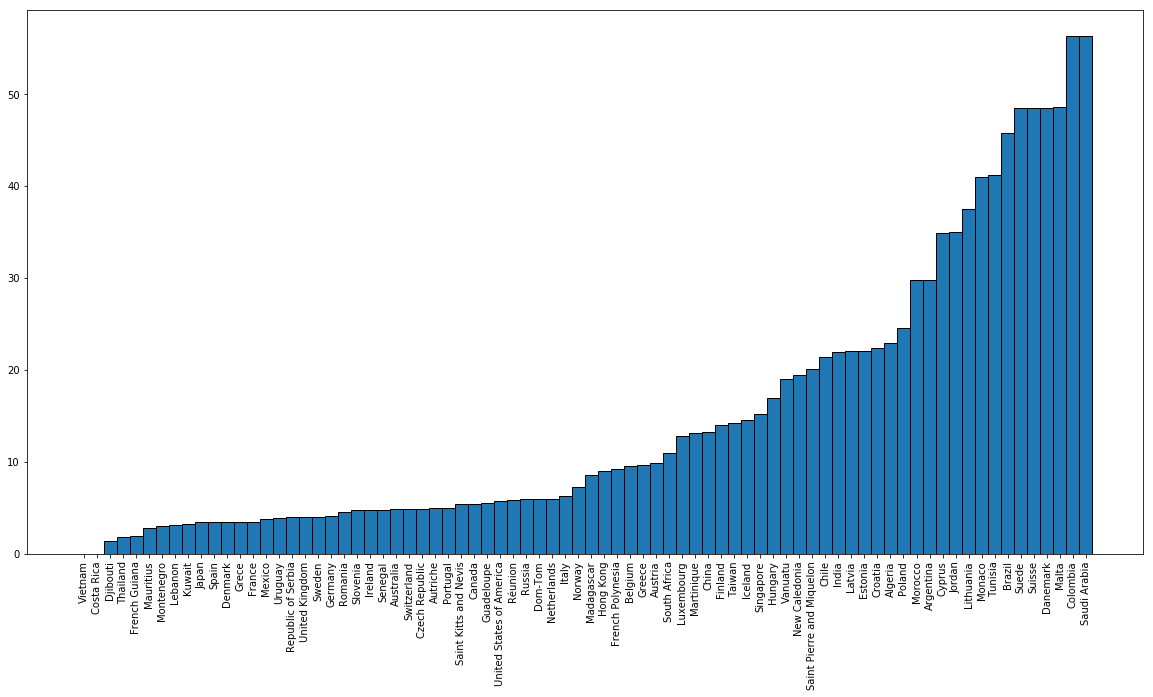

In [135]:
# For each country, find the median value of sugar capacity for all the products in this country
median_sugar = complete_food.groupby("country").median().sugars_100g
median_sugar = median_sugar.sort_values()

# Plot !
fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(median_sugar.index,median_sugar.values, align='center', width=1,log=False,edgecolor = "black")
plt.xticks(rotation=90);

In [136]:
print("The percentage of country with a median product containing more than 25g of sugar is "+ \
        str(100*np.sum(median_sugar>=25)/len(median_sugar))+"%")
print("The percentage of country with a median product containing more than 10g of sugar is "+ \
        str(100*np.sum(median_sugar>=10)/len(median_sugar))+"%")

The percentage of country with a median product containing more than 25g of sugar is 17.94871794871795%
The percentage of country with a median product containing more than 10g of sugar is 42.30769230769231%


With the previous histogram, we can directly say some stuff.

First of all, we notice that the countries in South-America and in the Arab countries. Secondly we also notice that the European countries tend to eat less sugar per 100g in the products sell in those countries. 

Finally, we also notice that the median percent of sugar in the different products is above the 25g of sugar per days. This is the case in approximately 15% of the countries around the world. It is huge, knowing that it is for only one product. This percent get up to more than 40% if we take the products with more than 10g inside. This seems to show that we eat too much sugar!


In [137]:
# We create a DataFrame from the previous Pandas Series
median_sugar_df = pd.DataFrame({'country': median_sugar.index, 'sugars_100g': median_sugar.values})

In [138]:
def AddMissingCountries(df,fileJson,p):
    
    """
    This add the missing countries for a given property. This function can be reuse for other visualizations
    Input: 
        df: a dataframe in which we must add the missing countries
        fileJson: a json file containing all the name of all the countries
        p: the property we want to fill in string format
    Output:
        a dataframe with the good format.
    """
    
    with open(fileJson) as f:
        data = json.load(f)
    feat = data['features']
    for fe in feat:
        prop = fe['properties']
        name = prop['name']
        if (name not in df.country.values):
            df = df.append({'country':name,p:-1},ignore_index=True)
    return df

In [139]:
median_sugar_df = AddMissingCountries(median_sugar_df,DATAPATH+"world-countries.json","sugars_100g")

In [140]:
def plot_choropleth(data_dict, legend, min_val, max_val, color_steps=6):
    # Create a Folium Map of the World
    world = folium.Map(location=[30, 0], tiles='cartodbpositron', zoom_start=1.5)

    # Add color range
    linear = folium.branca.colormap.LinearColormap(['white','yellow','red'], vmin=min_val, vmax=max_val)
    linear = linear.to_step(color_steps)
    
    # Plot custom choropleth map    
    folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor':'black' if data_dict[feature['properties']['name']] == -1 else linear(data_dict[feature['properties']['name']]),
        'color': 'black',
        'weight': 1
    }
    ).add_to(world)
    
    # Add legend for color range
    linear.caption = legend
    world.add_child(linear)


    # Add a legend for cantons with no data
    template = """
    {% macro html(this, kwargs) %}

    <!doctype html>
    <html lang="en">
    <head>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1">
      <title>jQuery UI Draggable - Default functionality</title>
      <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
      <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
      <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
    </head>
    <body>
    <div id='maplegend' class='maplegend' 
        style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
         border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>     
    <div class='legend-scale'>
      <ul class='legend-labels'>
        <li><span style='background:grey;opacity:0.8;'></span>Countries for which no data was available</li>
      </ul>
    </div>
    </div>
    </body>
    </html>
    <style type='text/css'>
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 1px solid #999;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    {% endmacro %}"""

    macro = MacroElement()
    macro._template = Template(template)

    world.get_root().add_child(macro)

    return world

In [141]:
median_sugar_dict = median_sugar_df.set_index('country')['sugars_100g']
sugar_world = plot_choropleth(median_sugar_dict, 'Quantity of sugar per 100g', 0, max(median_sugar_df["sugars_100g"]),10)

# Save the map
sugar_world.save('world_sugar.html')

sugar_world

Map : [*Quantity of sugar per 100g*](world_sugar.html)

Seeing the previous map, we can say multiple things:

1) There are a lot of missing values... Those missing values are manely in the south part of the world (e.g. Africa) This could be explained by the fact that there are a lot of poor countries and inform about the product on their country is not their main focus. It could also be explained by the fact that the website OpenFoodFact seems to be more an european thing, mostly because it was created by a french programmer in 2012.

2) The sugar is more present in the countries in the south (even if it is not necessarly those countries that have the most entries in the dataset). The sugar is also present in the Arabic country, maybe reflecting the food culture, in which they use more sweet recipes.

3) Europe doesn't have the most sugar in their product. This could be explain by the fact that maybe the european countries begin to understand that too much sugar is not good for the health...

We can do the same but this time for the vegetables and fruits.

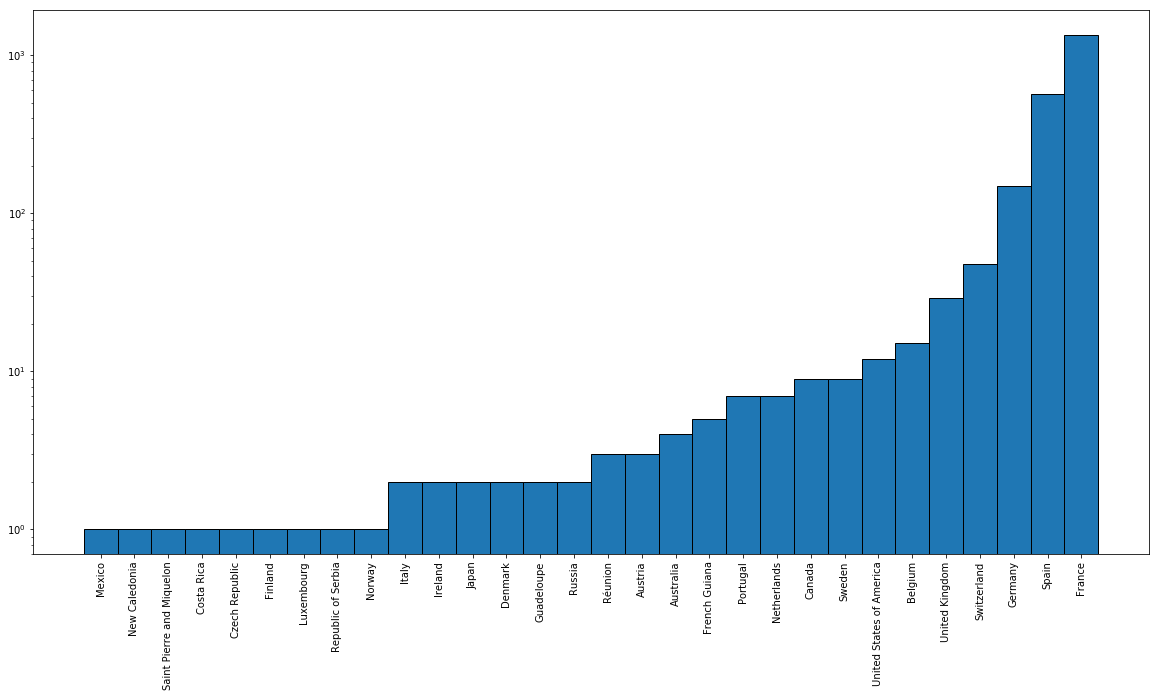

In [142]:
Legume = complete_food.groupby("pnns_groups_2").get_group('Legumes').country.value_counts()
legume = complete_food.groupby("pnns_groups_2").get_group('legumes').country.value_counts()
fruit = complete_food.groupby("pnns_groups_2").get_group('fruits').country.value_counts()
Fruit = complete_food.groupby("pnns_groups_2").get_group('Fruits').country.value_counts()
Vegetable = complete_food.groupby("pnns_groups_2").get_group('Vegetables').country.value_counts()
vegetable = complete_food.groupby("pnns_groups_2").get_group('vegetables').country.value_counts()

Vegetables = Vegetable
Vegetables = Vegetables.add(vegetable,fill_value=0)
Vegetables = Vegetables.add(Fruit,fill_value=0)
Vegetables = Vegetables.add(fruit,fill_value=0)
Vegetables = Vegetables.add(legume,fill_value=0)
Vegetables = Vegetables.add(Legume,fill_value=0)
Vegetables = Vegetables.sort_values()

fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(Vegetables.index,Vegetables.values, align='center', width=1,log=True,edgecolor = "black")
plt.xticks(rotation=90);

This time we notice that it seems that there are more product with vegetables proposed in the countris in Europe. This is, however, not necessary the case, since it might be due to the fact that we have much more informations about the european countries than the other ones. 

In [143]:
# We create a dataframe from the previous pandas Series
Vegetables_df = pd.DataFrame({'country':Vegetables.index, 'vegetables':Vegetables.values})

In [144]:
Vegetables_df = AddMissingCountries(Vegetables_df,DATAPATH+"world-countries.json","vegetables")

In [146]:
Vegetables_dict = Vegetables_df.set_index('country')['vegetables']
vegetables_world = plot_choropleth(Vegetables_dict, 'Quantity of products that are vegetables', 0, max(Vegetables_df["vegetables"]),5)

# Save the map
vegetables_world.save("vegetables_world.html")

vegetables_world

Map : [Quantity of products that are vegetables](vegetables_world.html)

In the previous map, we firstly see that there are a lot of missing values (the grey on the map). Furthermore, we notice that we can only find a lot of product with vegetables in Europe. This could be explain as before, namely that there are a much more product from Europe than from the rest of the world on OpenFoodFact.

Finally we notice in South-America that one country is colored in red. This country is the French Guiana. This is not surprising since this part of South-America belongs to France and thus, the number of products will be the same for this region as for France. 

### Goals for the next milestone 

*What until now? What comes next?*

We are quite satisfied with the way we have chosen to handle our data. Our DataFrames are structured and clean, and we are fully clear with each feature and its utility.

We were able to visualize a few results, to make some reasoning and to produce meaningful observations.

For the next Milestone, we will try to work with the other features of our dataset, and maybe find the correlation we were expecting in our main research questions. 

One other point that wasn't mention in the research questions but might also be interesting is to try to see which countries are close to each other in terms of food. We could try to cluster the countries with respect to some features and see if we can see any suprising groups!